**Assignment 2B**\
**Jule Valendo Halim -1425567**\
**4/24/2024**

Number of Entries: 54017
Number of Unique Doctors: 19097 

Distribution of Ratings:
 rating
 1    38847
-1    15170
Name: count, dtype: int64


<Axes: title={'center': 'Distribution Graph of Ratings'}, xlabel='Count', ylabel='Rating'>

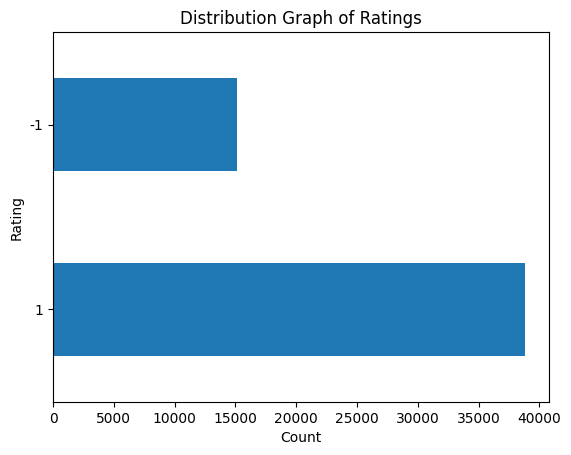

In [38]:
##Question 1

##loading in the dr_review

import pandas as pd

path='./DR_REVIEW/ratemd-dr-ratings.csv'
drReview=pd.read_csv(path)

print('Number of Entries:',drReview.shape[0])
print('Number of Unique Doctors:',drReview['dr-id-adjusted'].nunique(),'\n')

ratings=drReview['rating'].value_counts()
print("Distribution of Ratings:\n",ratings)

ratings.plot(kind='barh',title='Distribution Graph of Ratings', xlabel='Count',ylabel='Rating')

In [ ]:
## Question 2